In this notebook we analize games data:
- how many games there are
- how many games with more than 10000 votes there are
- what are the possible categories, mechanics, game types and designers of games and what are their distributions

# General games data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
games_df = pd.read_json('data/bgg_GameItem.jl', lines = True)

In [3]:
# Number of games
len(games_df)

100056

In [4]:
# Data available
games_df.columns

Index(['add_rank', 'alt_name', 'artist', 'avg_rating', 'bayes_rating',
       'best_rating', 'bgg_id', 'category', 'compilation', 'complexity',
       'cooperative', 'description', 'designer', 'easiest_complexity',
       'family', 'game_type', 'hardest_complexity',
       'highest_language_dependency', 'image_file', 'image_url',
       'language_dependency', 'lowest_language_dependency', 'max_players',
       'max_players_best', 'max_players_rec', 'max_time', 'mechanic',
       'min_age', 'min_age_rec', 'min_players', 'min_players_best',
       'min_players_rec', 'min_time', 'name', 'num_votes', 'publisher', 'rank',
       'stddev_rating', 'url', 'video_url', 'worst_rating', 'year',
       'implementation', 'expansion', 'integration', 'compilation_of'],
      dtype='object')

In [5]:
top_voted = np.sort(games_df.loc[games_df['num_votes'] > 10000]['num_votes'].dropna().astype(int))[::-1]

In [6]:
# Number of games with over 10,000 votes
len(top_voted)

322

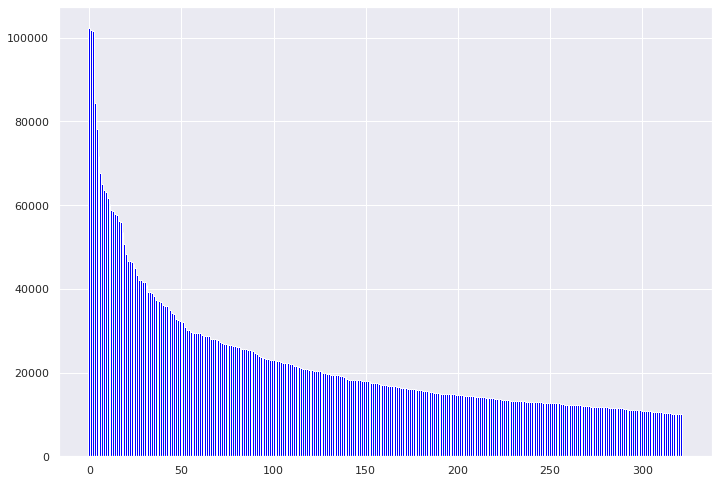

In [7]:
# Votes distribution amongst top rated games
plt.bar(np.arange(len(top_voted)), top_voted, color='blue', width=1.0)
pass

In [8]:
# Sample of data
games_df[['name', 'category', 'mechanic', 'year', 'avg_rating', 'num_votes', 'complexity']].head(100)

,name,category,mechanic,year,avg_rating,num_votes,complexity
0,Die Macher,"[Economic:1021, Negotiation:1026, Political:1001]","[Alliances:2916, Area Majority / Influence:208...",1986.0,7.62694,5225.0,4.3245
1,Dragonmaster,"[Card Game:1002, Fantasy:1010]",[Trick-taking:2009],1981.0,6.63055,553.0,1.9630
2,Samurai,"[Abstract Strategy:1009, Medieval:1035]","[Area Majority / Influence:2080, Hand Manageme...",1998.0,7.45016,14768.0,2.4885
3,Tal der Könige,[Ancient:1050],"[Action Points:2001, Area Majority / Influence...",1992.0,6.59888,339.0,2.6667
4,Acquire,"[Economic:1021, Territory Building:1086]","[Hand Management:2040, Investment:2910, Market...",1964.0,7.33927,18216.0,2.5041
5,Mare Mediterraneum,"[Civilization:1015, Nautical:1008]",[Dice Rolling:2072],1989.0,6.49813,80.0,3.0000
6,Cathedral,[Abstract Strategy:1009],"[Enclosure:2043, Pattern Building:2048, Patter...",1978.0,6.52010,3227.0,1.7971
7,Lords of Creation,"[Civilization:1015, Fantasy:1010]",[Modular Board:2011],1993.0,6.12706,201.0,2.4000
8,El Caballero,[Exploration:1020],"[Area Majority / Influence:2080, Tile Placemen...",1998.0,6.46041,1379.0,3.1824
9,Elfenland,"[Fantasy:1010, Travel:1097]","[Card Drafting:2041, Hand Management:2040, Net...",1998.0,6.70839,8090.0,2.1590


# Game attributes data

In [9]:
def describe(attribute, n_most_popular=20, n_least_popular=5):
    print(f"Number of unique values: {len(np.unique(np.hstack(games_df[attribute].dropna())))}")
    print(f"Number of missing fields: {np.sum(games_df[attribute].isna())}")
    value_counts = pd.Series(np.hstack(games_df[attribute].dropna())).value_counts()
    print()
    print(f"{n_most_popular} most popular values:")
    print(value_counts.head(n_most_popular))
    print()
    print(f"{n_least_popular} least popular values:")
    print(value_counts[::-1].head(n_least_popular))

def plot(attribute):
    value_counts = pd.Series(np.hstack(games_df[attribute].dropna())).value_counts()
    plt.figure(figsize=(12,4))
    sns.barplot(x = value_counts.index, y = value_counts.values).set(xticklabels=[])

## Mechanics

In [10]:
describe('mechanic')

Number of unique values: 182
Number of missing fields: 15463

20 most popular values:
Dice Rolling:2072                     22512
Roll / Spin and Move:2035             15406
Hand Management:2040                  12010
Set Collection:2004                   11420
Card Drafting:2041                     6636
Hexagon Grid:2026                      6335
Simulation:2070                        6271
Variable Player Powers:2015            5990
Tile Placement:2002                    5391
Cooperative Game:2023                  4903
Memory:2047                            4788
Point to Point Movement:2078           4275
Grid Movement:2676                     4206
Modular Board:2011                     3982
Area Majority / Influence:2080         3928
Auction/Bidding:2012                   3905
Trading:2008                           3532
Area Movement:2046                     3423
Simultaneous Action Selection:2020     3419
Player Elimination:2685                3303
dtype: int64

5 least popular valu

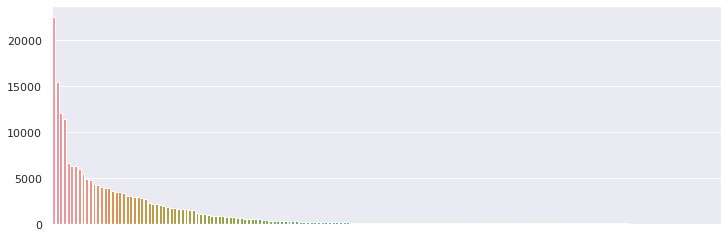

In [11]:
plot('mechanic')

## Categories

In [12]:
describe('category')

Number of unique values: 84
Number of missing fields: 2045

20 most popular values:
Card Game:1002                    24307
Children's Game:1041              13530
Wargame:1019                      12976
Party Game:1030                    9046
Dice:1017                          8946
Abstract Strategy:1009             8746
Educational:1094                   7949
Fantasy:1010                       7472
Trivia:1027                        6456
Economic:1021                      6172
Print & Play:1120                  6106
Animals:1089                       5779
Movies / TV / Radio theme:1064     5605
Action / Dexterity:1032            5498
Science Fiction:1016               5459
Miniatures:1047                    5195
Fighting:1046                      4852
Sports:1038                        4747
Humor:1079                         4726
Racing:1031                        4327
dtype: int64

5 least popular values:
Fan Expansion:2687               14
Korean War:1091                 101
Americ

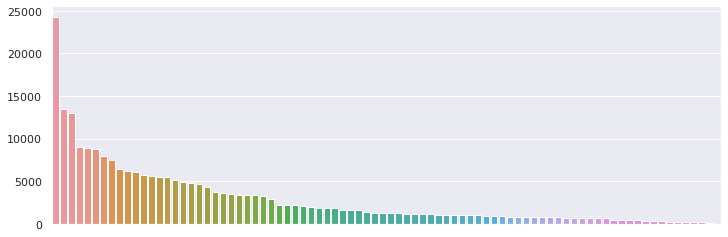

In [13]:
plot('category')

# Types

In [14]:
describe('game_type', n_least_popular=0)

Number of unique values: 12
Number of missing fields: 78358

20 most popular values:
War Game:4664           7849
Abstract Game:4666      4601
Children's Game:4665    4007
Family Game:5499        2335
Strategy Game:5497      2270
Thematic:5496           1212
Party Game:5498          625
Customizable:4667        525
Commodore 64:4420          1
Arcade:4781                1
Amiga:4415                 1
Atari ST:4976              1
dtype: int64

0 least popular values:
Series([], dtype: int64)


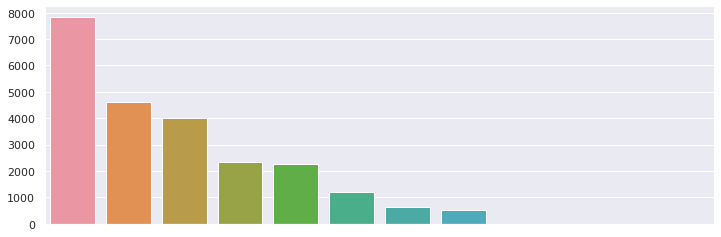

In [15]:
plot('game_type')

## Designers

In [16]:
describe('designer')

Number of unique values: 30923
Number of missing fields: 14601

20 most popular values:
(Uncredited):3           18749
Lloyd Krassner:810         905
Reiner Knizia:2            582
Charles Darrow:1268        262
Joseph Miranda:337         238
Wolfgang Kramer:7          222
Paul Rohrbaugh:812         189
James Ernest:61            184
Heinz Meister:256          164
Richard H. Berg:135        164
Perry Moore:1257           143
Ty Bomba:1747              142
Michael Rüttinger:581      136
Sid Sackson:4              131
Michael Schacht:86         129
Garrett J. Donner:315      129
Reinhold Wittig:94         128
Michael S. Steer:1050      128
Kai Haferkamp:645          126
Markus Brand:6941          124
dtype: int64

5 least popular values:
Charly von Feyerabend:78776    1
Maryam Saadati:119483          1
Laurent Henninger:42922        1
Paulo Luvizoto:79099           1
Daniel Ortiz Lausin:81194      1
dtype: int64
